In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [0]:
from keras.datasets import cifar10
# The data, split between train and test sets:
(x_train_unshuffled, y_train_unshuffled), (x_test, y_test) = cifar10.load_data()

In [3]:
digit_train, counts_train = np.unique(y_train_unshuffled, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train))
print(distribution_train )

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


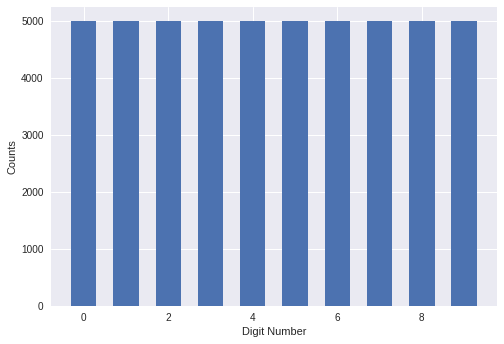

In [4]:
plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()

In [5]:
x_train_unshuffled.shape

(50000, 32, 32, 3)

In [6]:
digit_test, counts_test = np.unique(y_test, return_counts = True)

distribution_test = dict(zip(digit_test, counts_test))
print(distribution_test)

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


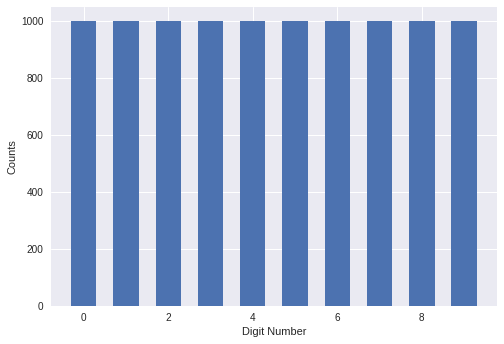

In [7]:
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [0]:
# Flatten images to 1-D vector of 3072 features (32x32x3), then convert to float64 numbers.
# The pixel values for each image in the dataset are unsigned integers in the range between no color and full color, 
# or 0 and 255.  Convert the data type from unsigned integers to floats, then standardize pixel values.
# StandardScaler() standardizes pixel values.

from sklearn.preprocessing import StandardScaler

# Reshape images to 1D vector of 3072 features (32x32x3)
x_train_reshape = x_train_unshuffled.flatten().reshape(50000,-1)
x_test_reshape = x_test.flatten().reshape(10000,-1)

# Convert the data type from unsigned integers to floats, then perform standardization
# For StandardScaler(), see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# fit_transform(X[, y]):  Fit to data, then transform it.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_reshape.astype(np.float64))
X_test_scaled = scaler.fit_transform(x_test_reshape.astype(np.float64))

y_train_unshuffled = y_train_unshuffled.astype(np.int64)
y_test = y_test.astype(np.int64)

In [9]:
type(y_train_unshuffled[1,0])

numpy.int64

In [8]:
X_train_scaled.shape

(50000, 3072)

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 
               'horse', 'ship', 'truck']

In [10]:
idx = np.where(y_train_unshuffled[:]==1)[0]
idx[1]

5

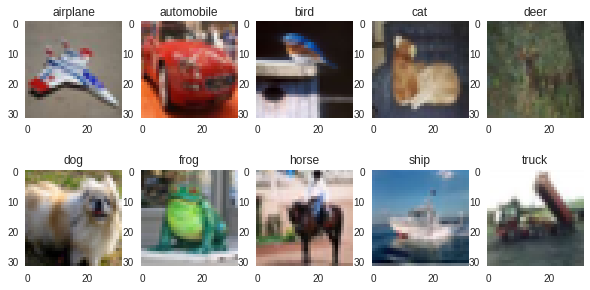

In [13]:
fig_object, ax_object = plt.subplots(2, 5, figsize=(10,5))
ax_object = ax_object.reshape(10,)
      
for i in range(10):
    ax = ax_object[i]
    idx = np.where(y_train_unshuffled[:]==i)[0]
    ax.imshow(x_train_reshape[idx[1],::].reshape(32,32,3), cmap = plt.cm.binary, interpolation = 'nearest')
    ind = y_train_unshuffled[idx[1]] 
    ax.set_title(class_names[i])
    ax.grid(False)
plt.show()


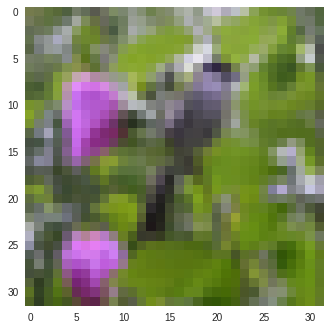

In [12]:
#Example of a bird
plt.imshow(x_train_reshape[300].reshape(32,32,3), cmap = plt.cm.binary, interpolation = 'nearest') #plt.axis("off")
plt.imshow(x_train_reshape[300].reshape(32,32,3), cmap = plt.cm.binary, interpolation = 'nearest')
plt.grid(False)
plt.show()

In [0]:
np.random.seed(42)

In [0]:
X_train, X_val, y_train, y_val  = train_test_split(X_train_scaled, y_train_unshuffled, test_size = 1/10, random_state = 42)

In [15]:
print(X_train.shape, X_val.shape)
print(y_train, y_val)

(45000, 3072) (5000, 3072)
[[3]
 [1]
 [0]
 ...
 [8]
 [8]
 [8]] [[7]
 [8]
 [0]
 ...
 [6]
 [8]
 [5]]


In [27]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10,
                                         feature_columns=feature_columns, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # to be compatible with sklearn
dnn_clf.fit(X_train, y_train, batch_size=50, steps=1000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f52f27a1c18>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpw2152o2d'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpw2152o2d/model.ckpt.
INFO:tensorflow:loss = 2.70678

SKCompat()

In [28]:
# Model is trained on training set.  
# Validation set is just used to make predictions using the model trained on training set.

y_pred = dnn_clf.predict(X_val)
accuracy_score(y_val, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpw2152o2d/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.3876

In [29]:
#learning curve (around 1 epoch)

Train_size_list_1ep = []
Train_error_list_1ep = []
Val_error_list_1ep = []
Train_time_list_1ep = []
Val_time_list_1ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train, y_train, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_1ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, steps=((1-j)*1100) ) # 1 epoch
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_1ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_1ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_1ep.append(Train_error)
    Val_error_list_1ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_1ep)
print("Train_error_list: ", Train_error_list_1ep)
print("Val_error_list: ", Val_error_list_1ep)
print("Train_time_list: ", Train_time_list_1ep)
print("Val_time_list: ", Val_time_list_1ep)   

Train_set_size: 45
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f52ec436128>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpa3t_7jw9'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpa3t_7jw9/model.ckpt.
INFO:tensor

In [31]:
#learning curve (around 5 epoch)

Train_size_list_5ep = []
Train_error_list_5ep = []
Val_error_list_5ep = []
Train_time_list_5ep = []
Val_time_list_5ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train, y_train, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_5ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, steps=((1-j)*1100*5) ) # 5 epochs
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_5ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_5ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                       
    Train_error_list_5ep.append(Train_error)
    Val_error_list_5ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_5ep)
print("Train_error_list: ", Train_error_list_5ep)
print("Val_error_list: ", Val_error_list_5ep)
print("Train_time_list: ", Train_time_list_5ep)
print("Val_time_list: ", Val_time_list_5ep)   

Train_set_size: 45
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f52ec525cc0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp11zosgqe'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp11zosgqe/model.ckpt.
INFO:tensor

In [32]:
#learning curve (around 10 epoch)

Train_size_list_10ep = []
Train_error_list_10ep = []
Val_error_list_10ep = []
Train_time_list_10ep = []
Val_time_list_10ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train, y_train, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_10ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, steps=((1-j)*1100*10) ) # 10 epochs
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_10ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_10ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_10ep.append(Train_error)
    Val_error_list_10ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_10ep)
print("Train_error_list: ", Train_error_list_10ep)
print("Val_error_list: ", Val_error_list_10ep)
print("Train_time_list: ", Train_time_list_10ep)
print("Val_time_list: ", Val_time_list_10ep)   

Train_set_size: 45
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f52ebf0f6d8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpjv6vyrar'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpjv6vyrar/model.ckpt.
INFO:tensor

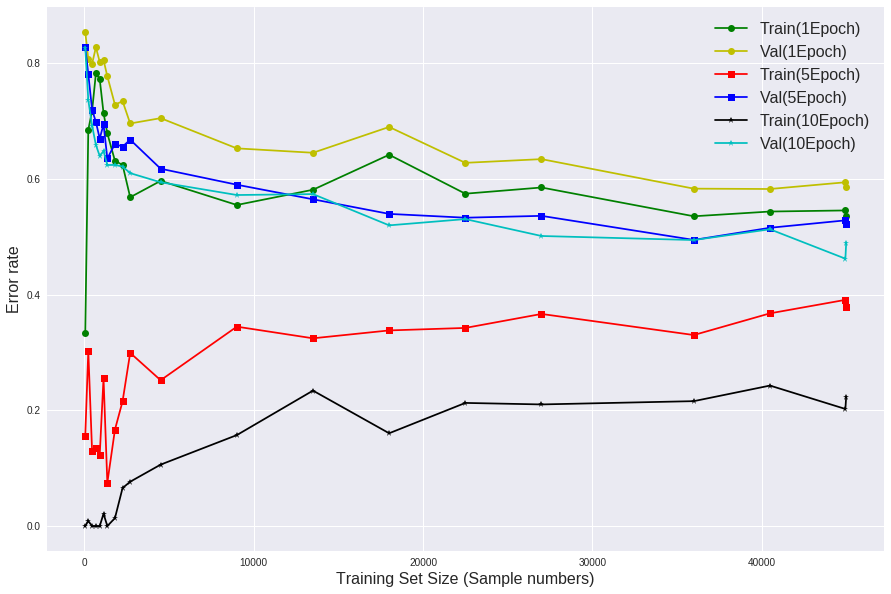

In [33]:
#Drawing learning curve
plt.figure(figsize = (15,10))
plt.plot(Train_size_list_1ep, Train_error_list_1ep, 'go-', label = "Train(1Epoch)")
plt.plot(Train_size_list_1ep, Val_error_list_1ep, 'yo-', label = "Val(1Epoch)")
plt.plot(Train_size_list_5ep, Train_error_list_5ep, 'rs-', label = "Train(5Epoch)")
plt.plot(Train_size_list_5ep, Val_error_list_5ep, 'bs-', label = "Val(5Epoch)")
plt.plot(Train_size_list_10ep, Train_error_list_10ep, 'k*-', label = "Train(10Epoch)")
plt.plot(Train_size_list_10ep, Val_error_list_10ep, 'c*-', label = "Val(10Epoch)")
 

plt.xlabel('Training Set Size (Sample numbers)',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(loc="upper right", fontsize=16)

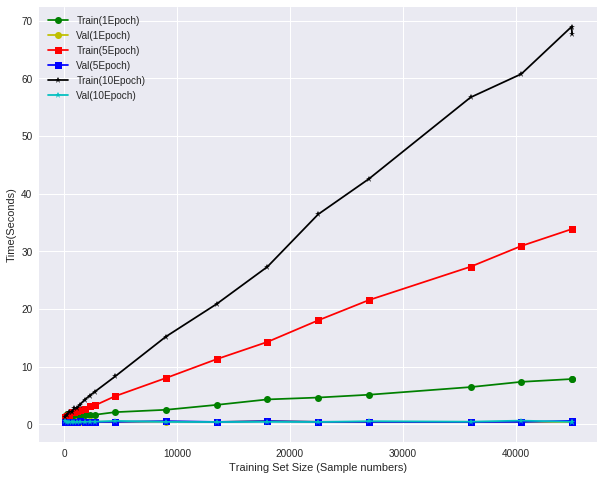

In [34]:
#How long it takes for different epochs
#Drawing train/val time v.s. training set

plt.figure(figsize = (10,8))
plt.plot(Train_size_list_1ep, Train_time_list_1ep, 'go-', label = "Train(1Epoch)")
plt.plot(Train_size_list_1ep, Val_time_list_1ep, 'yo-', label = "Val(1Epoch)")
plt.plot(Train_size_list_5ep, Train_time_list_5ep, 'rs-', label = "Train(5Epoch)")
plt.plot(Train_size_list_5ep, Val_time_list_5ep, 'bs-', label = "Val(5Epoch)")
plt.plot(Train_size_list_10ep, Train_time_list_10ep, 'k*-', label = "Train(10Epoch)")
plt.plot(Train_size_list_10ep, Val_time_list_10ep, 'c*-', label = "Val(10Epoch)")
 

plt.xlabel('Training Set Size (Sample numbers)')
plt.ylabel('Time(Seconds)')
plt.legend(loc="upper left", fontsize=10)

In [35]:
#Testing the number of neurons (activation fn RELU)
Nron_size_list_RELU = []
Train_error_list_RELU = []
Val_error_list_RELU = []
Train_time_list_RELU = []
Val_time_list_RELU = []

from sklearn.model_selection import train_test_split

for j in [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,3000,5000,8000,10000]:

    Nron_size_list_RELU.append(j)
    print('Neuron_set_size:', j)
    
    X_train_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) 
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_partial, y_train_partial, batch_size=50, steps=((1-0)*1100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_RELU.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    Val_time_list_RELU.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes']) 
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_RELU.append(Train_error)
    Val_error_list_RELU.append(Val_error)
    
print("Nron_size_list_RELU: ", Nron_size_list_RELU)
print("Train_error_list_RELU: ", Train_error_list_RELU)
print("Val_error_list_RELU: ", Val_error_list_RELU)
print("Train_time_list_RELU: ", Train_time_list_RELU)
print("Val_time_list_RELU: ", Val_time_list_RELU)   

Neuron_set_size: 10
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f52e696f0b8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpb0siw0sn'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpb0siw0sn/model.ckpt.
INFO:tenso

In [36]:
#Testing the number of neurons (activation fn Sigmoid)
Nron_size_list_SIGMO = []
Train_error_list_SIGMO = []
Val_error_list_SIGMO= []
Train_time_list_SIGMO = []
Val_time_list_SIGMO = []

from sklearn.model_selection import train_test_split

for j in [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,3000,5000, 8000,10000]:

    Nron_size_list_SIGMO.append(j)
    print('Neuron_set_size:', j)
    
    X_train_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10,activation_fn=tf.nn.sigmoid, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_partial, y_train_partial, batch_size=50, steps=((1-0)*1100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_SIGMO.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    Val_time_list_SIGMO.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes']) 
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_SIGMO.append(Train_error)
    Val_error_list_SIGMO.append(Val_error)
    
print("Nron_size_list_SIGMO: ", Nron_size_list_SIGMO)
print("Train_error_list_SIGMO: ", Train_error_list_SIGMO)
print("Val_error_list_SIGMO: ", Val_error_list_SIGMO)
print("Train_time_list_SIGMO: ", Train_time_list_SIGMO)
print("Val_time_list_SIGMO: ", Val_time_list_SIGMO)  

Neuron_set_size: 10
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f52ec1a8f60>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpp87kgl54'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpp87kgl54/model.ckpt.
INFO:tenso

In [37]:
#Testing the number of neurons (activation fn tanh)
Nron_size_list_TANH = []
Train_error_list_TANH = []
Val_error_list_TANH= []
Train_time_list_TANH = []
Val_time_list_TANH = []

from sklearn.model_selection import train_test_split

for j in [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,3000,5000,8000, 10000]:

    Nron_size_list_TANH.append(j)
    print('Neuron_set_size:', j)
    
    X_train_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10,activation_fn=tf.nn.tanh, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_partial, y_train_partial, batch_size=50, steps=((1-0)*1100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_TANH.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    Val_time_list_TANH.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_TANH.append(Train_error)
    Val_error_list_TANH.append(Val_error)
    
print("Nron_size_list_TANH: ", Nron_size_list_TANH)
print("Train_error_list_TANH: ", Train_error_list_TANH)
print("Val_error_list_TANH: ", Val_error_list_TANH)
print("Train_time_list_TANH: ", Train_time_list_TANH)
print("Val_time_list_TANH: ", Val_time_list_TANH)  

Neuron_set_size: 10
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f52e6cf1198>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpbng7562f'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpbng7562f/model.ckpt.
INFO:tenso

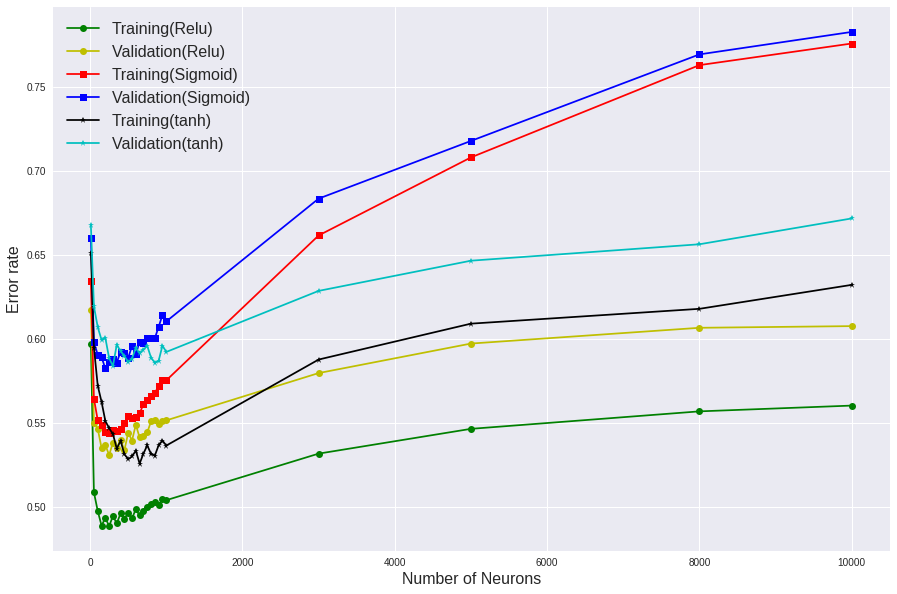

In [38]:
#Plot of the errors of the different activation functions
plt.figure(figsize = (15,10))
plt.plot(Nron_size_list_RELU, Train_error_list_RELU, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_RELU, Val_error_list_RELU, 'yo-', label = "Validation(Relu)")
plt.plot(Nron_size_list_SIGMO, Train_error_list_SIGMO, 'rs-', label = "Training(Sigmoid)")
plt.plot(Nron_size_list_SIGMO, Val_error_list_SIGMO, 'bs-', label = "Validation(Sigmoid)") 
plt.plot(Nron_size_list_TANH, Train_error_list_TANH, 'k*-', label = "Training(tanh)")
plt.plot(Nron_size_list_TANH, Val_error_list_TANH, 'c*-', label = "Validation(tanh)")

plt.xlabel('Number of Neurons',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(fontsize=16)

(0, 1000)

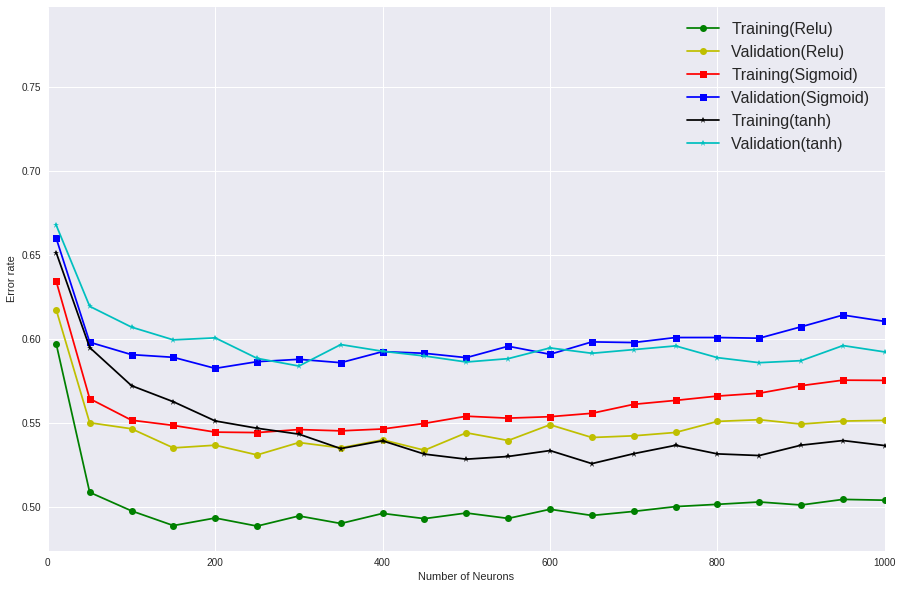

In [39]:
#Zooming into the plot above to find lowest error rate
plt.figure(figsize = (15,10))
plt.plot(Nron_size_list_RELU, Train_error_list_RELU, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_RELU, Val_error_list_RELU, 'yo-', label = "Validation(Relu)")
plt.plot(Nron_size_list_SIGMO, Train_error_list_SIGMO, 'rs-', label = "Training(Sigmoid)")
plt.plot(Nron_size_list_SIGMO, Val_error_list_SIGMO, 'bs-', label = "Validation(Sigmoid)") 
plt.plot(Nron_size_list_TANH, Train_error_list_TANH, 'k*-', label = "Training(tanh)")
plt.plot(Nron_size_list_TANH, Val_error_list_TANH, 'c*-', label = "Validation(tanh)")

plt.xlabel('Number of Neurons')
plt.ylabel('Error rate')
plt.legend(fontsize=16)
plt.xlim(0, 1000)

In [40]:
best_val_locatin_RELU = np.argmin(Val_error_list_RELU)
print("BEST VALIDATION ERROR", Val_error_list_RELU[best_val_locatin_RELU])
print("BEST VALIDATION ACCURACY", 1 - Val_error_list_RELU[best_val_locatin_RELU])
best_val_locatin_RELU

BEST VALIDATION ERROR 0.5307999999999999
BEST VALIDATION ACCURACY 0.46920000000000006


5

In [41]:
Nron_size_list_RELU[best_val_locatin_RELU]

250

In [21]:
#Finer grid search for RELU
Nron_size_list_FR = []
Train_error_list_FR = []
Val_error_list_FR = []
Train_time_list_FR = []
Val_time_list_FR = []

from sklearn.model_selection import train_test_split

for j in [100, 125, 150, 175, 200, 225, 250,275,300,325,350,375,400,425,450,475,500,525,550,575,600,625,650,675,700,725,750,784,800]:

    Nron_size_list_FR.append(j)
    print('Neuron_set_size:', j)
    
    X_train_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10, activation_fn=tf.nn.relu,feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_partial, y_train_partial, batch_size=50,  steps=5500 )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_FR.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    Val_time_list_FR.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_FR.append(Train_error)
    Val_error_list_FR.append(Val_error)
    
print("Nron_size_list_FR: ", Nron_size_list_FR)
print("Train_error_list_FR: ", Train_error_list_FR)
print("Val_error_list_FR: ", Val_error_list_FR)
print("Train_time_list_FR: ", Train_time_list_FR)
print("Val_time_list_FR: ", Val_time_list_FR)   

Neuron_set_size: 100
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5aa79689e8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpnd6pq3p6'}
Instructions for updating:
Please switch to the Est

(50, 850)

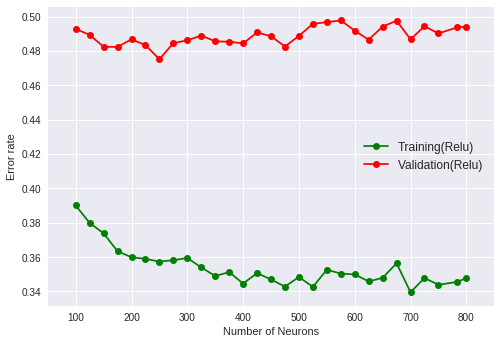

In [12]:
#plt.figure(figsize = (20,16))
plt.plot(Nron_size_list_FR, Train_error_list_FR, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_FR, Val_error_list_FR, 'ro-', label = "Validation(Relu)")


plt.xlabel('Number of Neurons')
plt.ylabel('Error rate')
plt.legend( fontsize=12)
plt.xlim(50, 850)

In [23]:
#Optimal Number of Neurons
Nron_opt = Nron_size_list_FR[np.argmin(Val_error_list_FR)]
Nron_opt

200

In [24]:
#Using the optimal number of neurons and the RELU activation function to implement classifier
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf_opt = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt], n_classes=10,
                                         feature_columns=feature_columns, config=config)
dnn_clf_opt = tf.contrib.learn.SKCompat(dnn_clf_opt)
dnn_clf_opt.fit(X_train, y_train, batch_size=50, steps=5500)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5aa79260b8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp7mk6v_af'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp7mk6v_af/model.ckpt.
INFO:tensorflow:loss = 2.88003

SKCompat()

In [25]:
#Final test accuracy
y_test_pred = dnn_clf_opt.predict(X_test_scaled)
accuracy_score(y_test, y_test_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7mk6v_af/model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.5243

In [16]:
type(y_test_pred['classes'])

numpy.ndarray

In [17]:
print(classification_report(y_test,y_test_pred['classes']))

             precision    recall  f1-score   support

          0       0.60      0.57      0.59      1000
          1       0.64      0.61      0.62      1000
          2       0.45      0.38      0.41      1000
          3       0.32      0.45      0.37      1000
          4       0.45      0.43      0.44      1000
          5       0.46      0.40      0.43      1000
          6       0.54      0.64      0.58      1000
          7       0.64      0.53      0.58      1000
          8       0.62      0.67      0.65      1000
          9       0.59      0.56      0.58      1000

avg / total       0.53      0.52      0.53     10000



In [26]:
conf_mx_DNN_1L = confusion_matrix(y_test, y_test_pred['classes'])



row_sum = np.sum(conf_mx_DNN_1L, axis =1, keepdims = True)
norm_conf_mx_DNN_1L = conf_mx_DNN_1L / row_sum
norm_conf_mx_DNN_1L.shape

(10, 10)

In [27]:
conf_mx_DNN_1L

array([[584,  29,  50,  30,  30,  15,  27,  22, 165,  48],
       [ 41, 635,  17,  25,  17,  10,  17,  18,  77, 143],
       [ 77,  18, 408, 116, 127,  73,  95,  50,  17,  19],
       [ 34,  19,  74, 417,  83, 168, 105,  58,  19,  23],
       [ 51,  14, 121,  89, 450,  50, 107,  76,  23,  19],
       [ 20,  11,  78, 297,  64, 362,  56,  54,  35,  23],
       [ 15,  16,  61, 120,  97,  47, 595,  18,  20,  11],
       [ 49,  12,  52,  89,  88,  74,  17, 564,  14,  41],
       [ 95,  69,  18,  32,  16,  12,   7,  14, 689,  48],
       [ 45, 183,  16,  49,  21,  16,  15,  50,  66, 539]])

[[0.    0.032 0.06  0.044 0.035 0.015 0.022 0.019 0.147 0.052]
 [0.046 0.    0.022 0.032 0.017 0.008 0.019 0.014 0.086 0.148]
 [0.073 0.014 0.    0.131 0.138 0.076 0.108 0.046 0.013 0.017]
 [0.023 0.02  0.064 0.    0.069 0.169 0.119 0.046 0.018 0.025]
 [0.042 0.013 0.113 0.103 0.    0.048 0.143 0.067 0.025 0.016]
 [0.015 0.011 0.067 0.292 0.069 0.    0.064 0.041 0.023 0.021]
 [0.009 0.017 0.052 0.127 0.066 0.052 0.    0.014 0.01  0.018]
 [0.051 0.015 0.058 0.106 0.094 0.068 0.035 0.    0.011 0.034]
 [0.088 0.061 0.017 0.052 0.024 0.013 0.007 0.01  0.    0.054]
 [0.04  0.158 0.017 0.058 0.016 0.018 0.019 0.035 0.078 0.   ]]


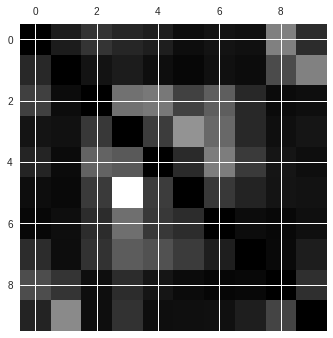

In [22]:
np.fill_diagonal(norm_conf_mx_DNN_1L, 0)
plt.matshow(norm_conf_mx_DNN_1L, cmap = plt.cm.gray)

print(norm_conf_mx_DNN_1L)